In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
X = np.zeros((2415 - 38, 32256))
Y = np.zeros(2415 - 38)
Xtest = np.zeros((38, 32256))
Ytest = np.zeros(38)

j = 0
i = 0
for subdir in os.listdir("final_dataset/yaleB/"):
    person = os.path.join("final_dataset/yaleB/", subdir)
    for imagefile in os.listdir(person):
        if imagefile.endswith("P00A-005E-10.pgm"):
            imageloc = os.path.join(person, imagefile)
            image = plt.imread(imageloc)
            curperson = int(subdir[5:]) - 1
            if curperson > 13:
                curperson -= 1
            Xtest[j, :] = image.flatten()
            Ytest[j] = curperson
            j += 1
        elif imagefile.endswith(".pgm"):
            imageloc = os.path.join(person, imagefile)
            image = plt.imread(imageloc)
            curperson = int(subdir[5:]) - 1
            if curperson > 13:
                curperson -= 1
            X[i, :] = image.flatten()
            Y[i] = curperson
            i += 1
    h, w = image.shape


In [3]:
indices = np.argsort(Y)
Ytrain = Y[indices]
Xtrain = X[indices, :]

A = Xtrain.T
mean_imgs = np.reshape(A.mean(axis=1), (32256, 1))
A = A - np.reshape(A.mean(axis=1), (32256, 1))


def calculating_eigen_vectors(A):
    U, D, Vt = np.linalg.svd(A.T @ A)
    evects = A @ Vt.T
    norm = np.linalg.norm(evects, axis=0)
    return evects / norm


evects = calculating_eigen_vectors(A)


In [4]:
def reducedA(k, eV, A):
    Areduced = eV[:, :k].T @ A
    Arecovered = eV[:, :k] @ Areduced
    return Arecovered


Examples of reconstruction using different number of eigenfaces taken


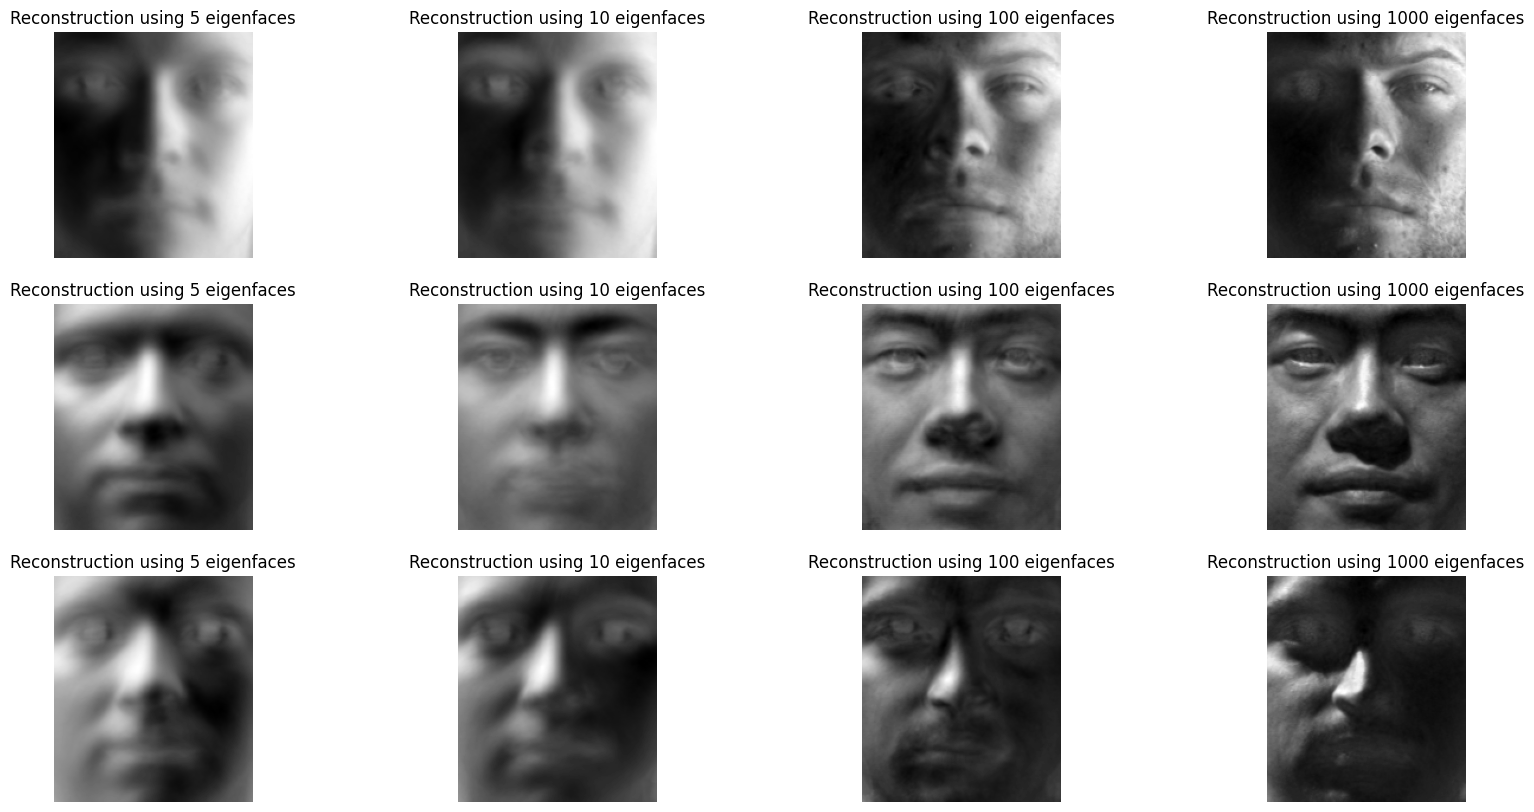

In [5]:
print("Examples of reconstruction using different number of eigenfaces taken")
fig = plt.figure(figsize=(20, 10))
eigenfaces_no = [5, 10, 100, 1000]
face_id = [20, 90, 540]
for i in range(12):
    ax = fig.add_subplot(3, 4, i + 1)
    plt.imshow(
        reducedA(eigenfaces_no[i % 4], evects, A)[
            :, face_id[math.floor(i / 4)]
        ].reshape((h, w)),
        cmap="gray",
    )
    plt.title("Reconstruction using " + str(eigenfaces_no[i % 4]) + " eigenfaces")
    plt.axis("off")

plt.show()


In [6]:
def which_trained_face(test_img, espace, mean_face, X_train, Y_train, actual=None):
    smallest_norm = 0x3F3F3F3F
    test_img = np.reshape(test_img, (32256, 1)) - mean_face

    for i in range(X_train.shape[0]):
        if i != actual or i is None:
            cur_img = np.reshape(X_train[i], (32256, 1)) - mean_face

            reduced_img = espace.T @ cur_img
            test_img_espace = espace.T @ test_img

            norm = np.linalg.norm(reduced_img - test_img_espace)

            if smallest_norm > norm:
                smallest_norm = norm
                person = Y_train[i]
                out = cur_img
    return smallest_norm, person, out


Text(0.5, 1.0, 'Prediction Class no.31.0')

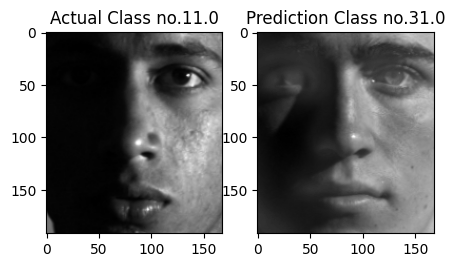

In [7]:
sN1, per1, out1 = which_trained_face(
    Xtrain[730], evects[:, 0:10], mean_imgs, Xtrain, Ytrain, 730
)
fig = plt.figure(figsize=(5, 40))

fig.add_subplot(1, 2, 1)
plt.imshow(Xtrain[730].reshape((h, w)), cmap="gray")
plt.title(f"Actual Class no.{Ytrain[730]}")

fig.add_subplot(1, 2, 2)
plt.imshow(out1.reshape((h, w)), cmap="gray")
plt.title(f"Prediction Class no.{per1}")


In [8]:
c1 = 0
per = []
out = []
for i in range(len(Xtest)):
    sn1, per1, out1 = which_trained_face(
        Xtest[i], evects[:, 0:10], mean_imgs, Xtrain, Ytrain
    )
    per.append(per1)
    out.append(out1)
    if Ytest[i] == per1:
        print(f"CORRECT GUESS for i={i}")
        c1 += 1
    else:
        print(f"WRONG GUESS for i={i}")
c1 = (c1 / len(Xtest)) * 100
print(f"Final accuracy of test images = {c1}%")


CORRECT GUESS for i=0
WRONG GUESS for i=1
CORRECT GUESS for i=2
CORRECT GUESS for i=3
CORRECT GUESS for i=4
CORRECT GUESS for i=5
CORRECT GUESS for i=6
CORRECT GUESS for i=7
CORRECT GUESS for i=8
CORRECT GUESS for i=9
WRONG GUESS for i=10
CORRECT GUESS for i=11
CORRECT GUESS for i=12
CORRECT GUESS for i=13
CORRECT GUESS for i=14
CORRECT GUESS for i=15
CORRECT GUESS for i=16
CORRECT GUESS for i=17
WRONG GUESS for i=18
CORRECT GUESS for i=19
CORRECT GUESS for i=20
CORRECT GUESS for i=21
CORRECT GUESS for i=22
CORRECT GUESS for i=23
CORRECT GUESS for i=24
CORRECT GUESS for i=25
CORRECT GUESS for i=26
CORRECT GUESS for i=27
CORRECT GUESS for i=28
WRONG GUESS for i=29
CORRECT GUESS for i=30
CORRECT GUESS for i=31
CORRECT GUESS for i=32
CORRECT GUESS for i=33
CORRECT GUESS for i=34
WRONG GUESS for i=35
CORRECT GUESS for i=36
WRONG GUESS for i=37
Final accuracy of test images = 84.21052631578947%


In [9]:
def plot_guesses(Xtest, Ytest, out, per):
    fig = plt.figure(figsize=(5, 40))

    fig.add_subplot(1, 2, 1)
    plt.imshow(Xtest.reshape((h, w)), cmap="gray")
    plt.title(f"Actual Class no.{Ytest}")

    fig.add_subplot(1, 2, 2)
    plt.imshow(out.reshape((h, w)), cmap="gray")
    plt.title(f"Prediction Class no.{per}")


# Correct guesses

/tmp/ipykernel_265887/2904878275.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(5, 40))


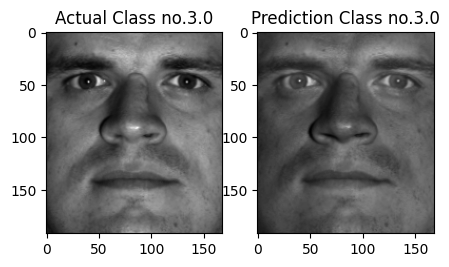

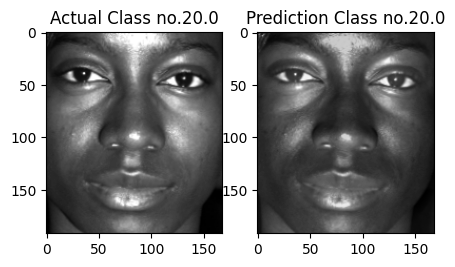

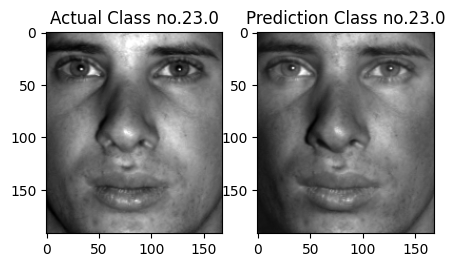

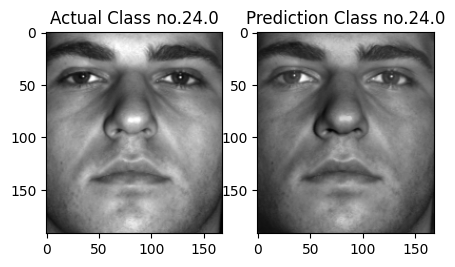

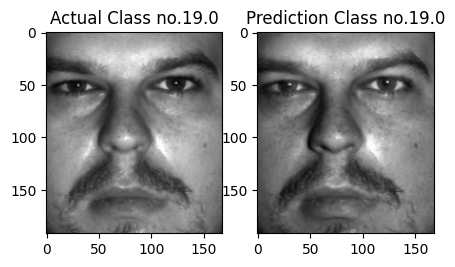

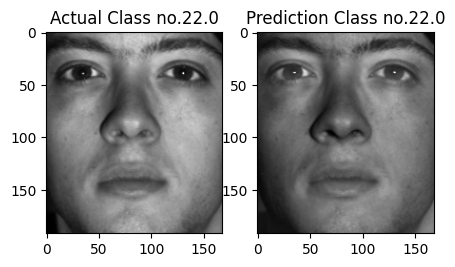

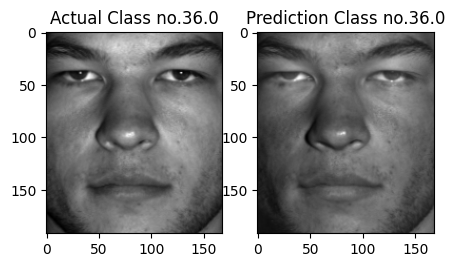

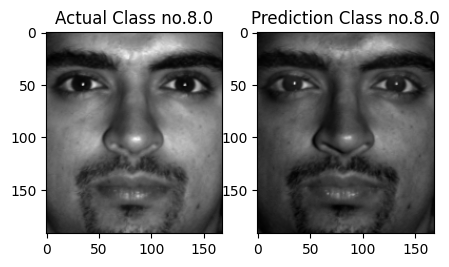

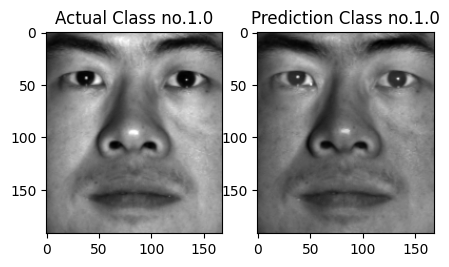

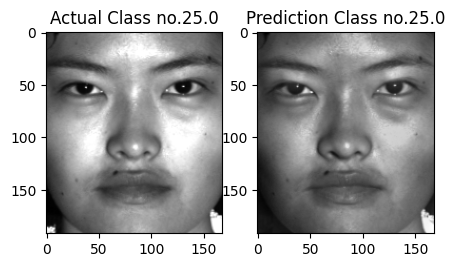

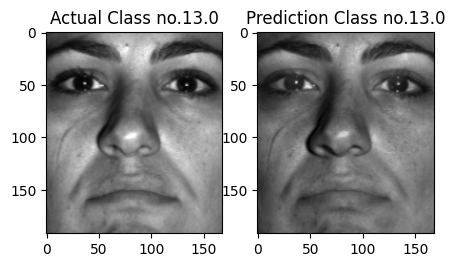

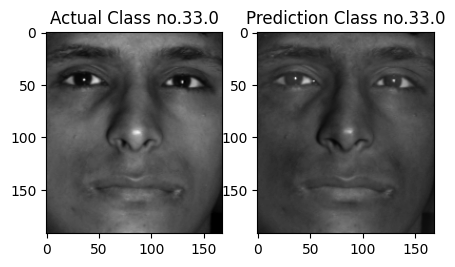

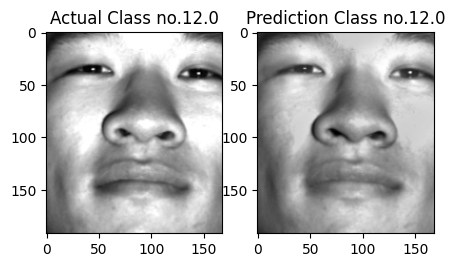

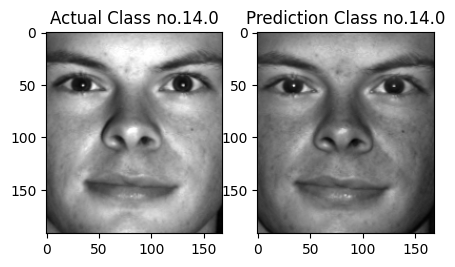

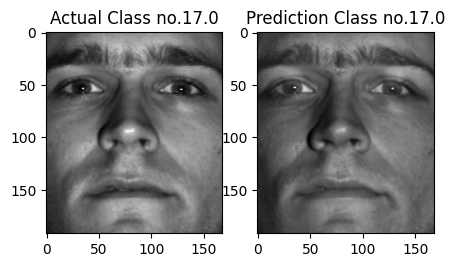

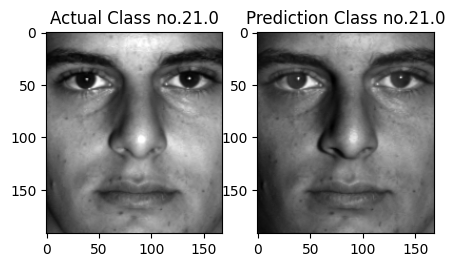

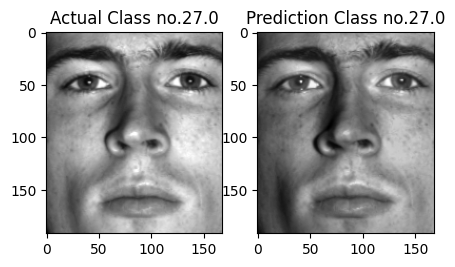

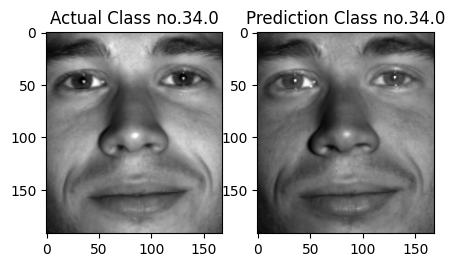

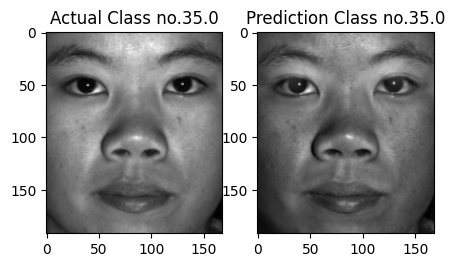

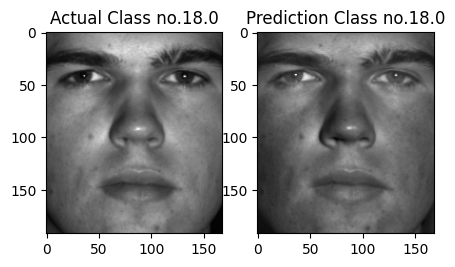

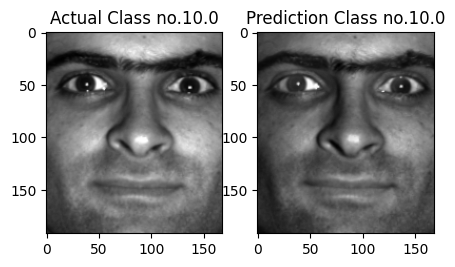

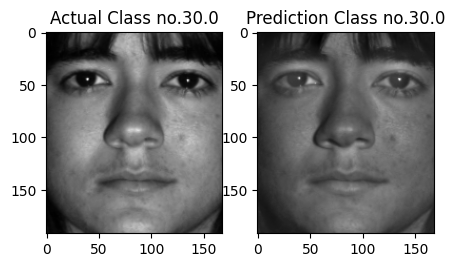

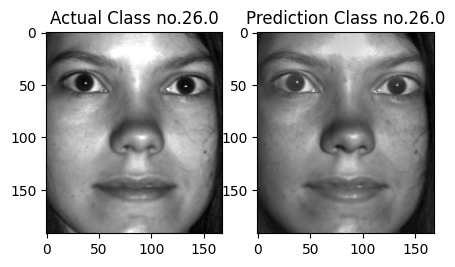

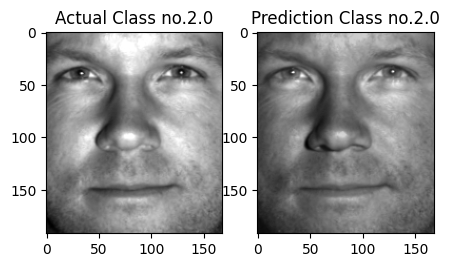

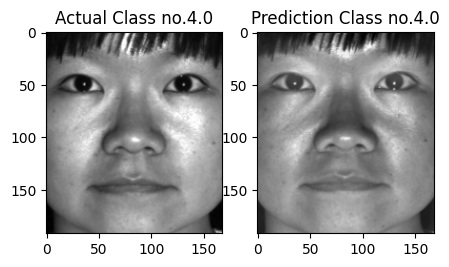

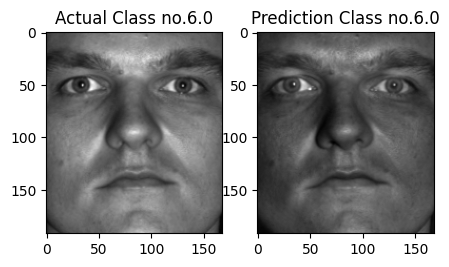

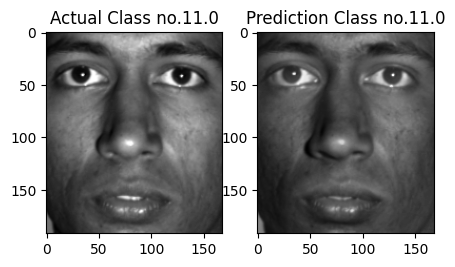

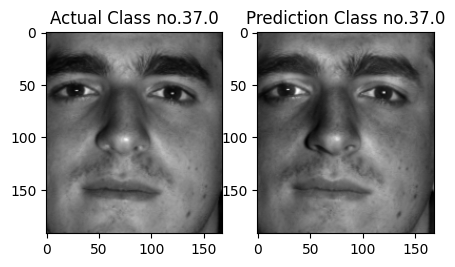

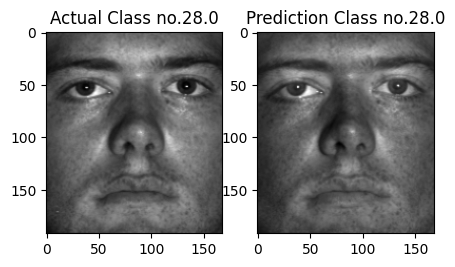

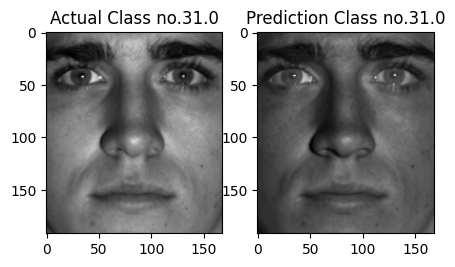

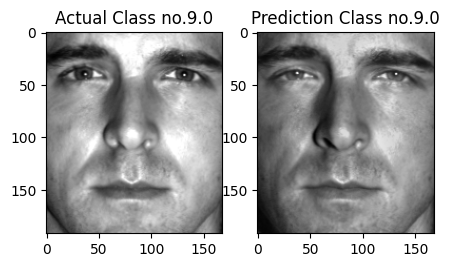

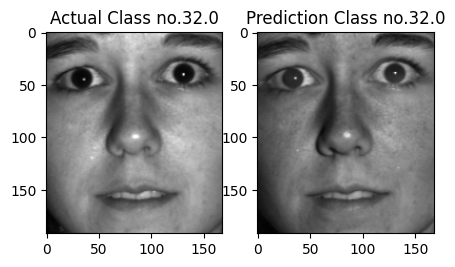

In [10]:
correct_guesses = []
correct_output = []
correct_person = []
for i in range(len(Xtest)):
    sn1, per1, out1 = which_trained_face(
        Xtest[i], evects[:, 0:10], mean_imgs, Xtrain, Ytrain
    )
    if Ytest[i] == per1:
        correct_guesses.append(i)
        correct_output.append(out1)
        correct_person.append(per1)

for i in range(len(correct_guesses)):
    plot_guesses(
        Xtest[correct_guesses[i]],
        Ytest[correct_guesses[i]],
        correct_output[i],
        correct_person[i],
    )


# Incorrect guesses

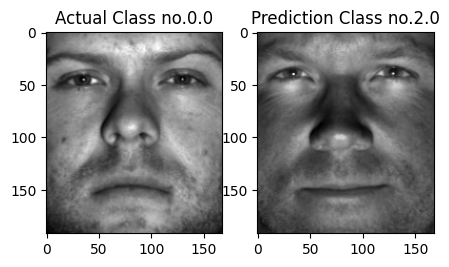

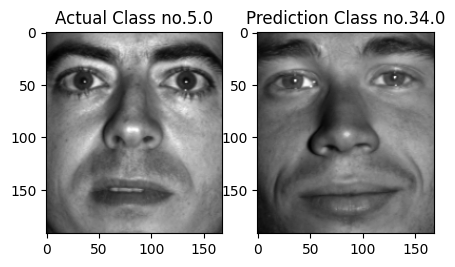

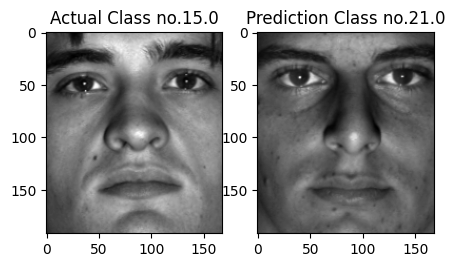

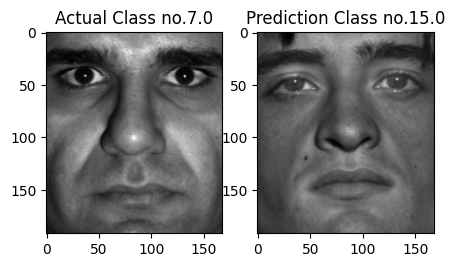

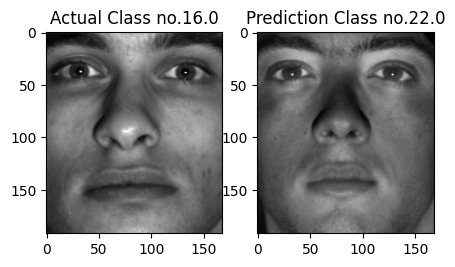

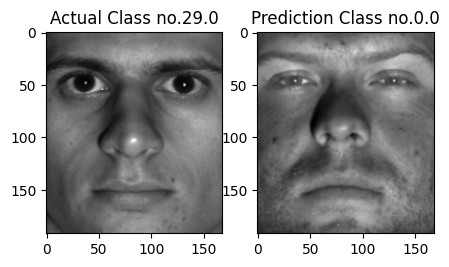

In [11]:
incorrect_guesses = []
incorrect_output = []
incorrect_person = []
for i in range(len(Xtest)):
    sn1, per1, out1 = which_trained_face(
        Xtest[i], evects[:, 0:10], mean_imgs, Xtrain, Ytrain
    )
    if Ytest[i] != per1:
        incorrect_guesses.append(i)
        incorrect_output.append(out1)
        incorrect_person.append(per1)

for i in range(len(incorrect_guesses)):
    plot_guesses(
        Xtest[incorrect_guesses[i]],
        Ytest[incorrect_guesses[i]],
        incorrect_output[i],
        incorrect_person[i],
    )
